<a href="https://colab.research.google.com/github/Neelamkanwar/Neelamkanwar/blob/main/Amir_GroupC_Neelam_Kanwar_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import warnings
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
%matplotlib inline

# . Data Preparation

In [ ]:
#load the dataset from colab
data = pd.read_csv('/content/cancerdata.csv')
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0}) #converts the results into 1 and 0 for ease of predictions
df=pd.DataFrame(data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Number of rows and coloums
df.shape

(340, 32)

In [ ]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       340 non-null    int64  
 1   diagnosis                340 non-null    int64  
 2   radius_mean              340 non-null    float64
 3   texture_mean             340 non-null    float64
 4   perimeter_mean           340 non-null    float64
 5   area_mean                340 non-null    float64
 6   smoothness_mean          340 non-null    float64
 7   compactness_mean         340 non-null    float64
 8   concavity_mean           340 non-null    float64
 9   concave points_mean      340 non-null    float64
 10  symmetry_mean            340 non-null    float64
 11  fractal_dimension_mean   340 non-null    float64
 12  radius_se                340 non-null    float64
 13  texture_se               340 non-null    float64
 14  perimeter_se             3

In [ ]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
335    1
336    0
337    1
338    0
339    1
Name: diagnosis, Length: 340, dtype: int64

In [ ]:
df.describe() # this will describe the all statistical function of our dat

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,2.482409e+07,0.461765,14.365132,19.127618,93.647853,676.906765,0.097476,0.107869,0.095696,0.052550,...,16.699894,25.600412,110.055412,927.541471,0.134137,0.265250,0.286866,0.120375,0.297864,0.084857
std,9.763163e+07,0.499271,3.549358,4.213935,24.476279,353.684317,0.013887,0.055955,0.082730,0.039597,...,4.936293,6.264302,34.242561,575.520941,0.023446,0.169432,0.216718,0.067927,0.068982,0.019626
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.620232e+05,0.000000,11.840000,15.935000,76.097500,432.150000,0.087597,0.066592,0.030270,0.020925,...,13.140000,21.095000,84.517500,526.675000,0.118050,0.143800,0.111600,0.063110,0.255550,0.071270
50%,8.836955e+05,0.000000,13.575000,18.895000,87.480000,566.250000,0.097175,0.097660,0.072140,0.039725,...,15.480000,25.265000,101.700000,725.900000,0.134100,0.221950,0.247250,0.110850,0.286950,0.080235
75%,8.810766e+06,1.000000,16.507500,21.630000,109.300000,842.050000,0.106525,0.134650,0.141900,0.079600,...,19.867500,29.875000,129.850000,1227.250000,0.149175,0.359400,0.398075,0.173425,0.327425,0.093082
max,8.810948e+08,1.000000,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,...,33.120000,49.540000,220.800000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# perview  of the catergoical Data
df.iloc[:,1].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
x=df.drop(['diagnosis', 'id'], axis=1)
y=df['diagnosis']

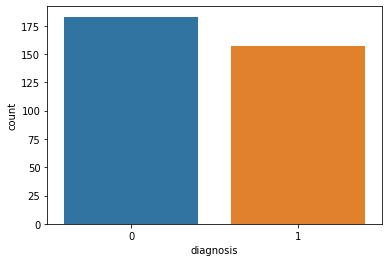

In [ ]:
sns.countplot(data['diagnosis'],label="Count")

In [ ]:
#Data transformation(catergorical to numerical if needed)
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.718806,0.500875,0.731784,0.687902,0.367880,0.593575,0.652024,0.754754,0.326085,0.001774
radius_mean,0.718806,1.000000,0.423675,0.997549,0.988328,0.143522,0.496456,0.644687,0.803743,0.160014,-0.302715
texture_mean,0.500875,0.423675,1.000000,0.431127,0.413134,0.064299,0.332535,0.364920,0.385123,0.133525,-0.033743
perimeter_mean,0.731784,0.997549,0.431127,1.000000,0.986793,0.184412,0.551317,0.687399,0.835815,0.198793,-0.247974
area_mean,0.687902,0.988328,0.413134,0.986793,1.000000,0.150722,0.484790,0.651832,0.800544,0.156187,-0.276103
smoothness_mean,0.367880,0.143522,0.064299,0.184412,0.150722,1.000000,0.648068,0.550297,0.569733,0.551321,0.582095
compactness_mean,0.593575,0.496456,0.332535,0.551317,0.484790,0.648068,1.000000,0.888529,0.840408,0.626951,0.578215
concavity_mean,0.652024,0.644687,0.364920,0.687399,0.651832,0.550297,0.888529,1.000000,0.914248,0.538812,0.398674
concave points_mean,0.754754,0.803743,0.385123,0.835815,0.800544,0.569733,0.840408,0.914248,1.000000,0.503950,0.202853
symmetry_mean,0.326085,0.160014,0.133525,0.198793,0.156187,0.551321,0.626951,0.538812,0.503950,1.000000,0.490074


# 3. Feature selection

In [ ]:
x=df.drop(['diagnosis', 'id'], axis=1)
y=df['diagnosis']

In [ ]:
#split the dataset into independent (X) and dependent (Y)
#Conversion of dataset from pandas df > numpy array for model creation : To check use type() function
X= df.iloc[:, 2:31].values # featues
Y= df.iloc[:,1].values #labels predicted

In [ ]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [ ]:
#now split our data into train and test
from sklearn.model_selection import train_test_split 
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(238, 32)
(102, 32)


In [ ]:

test_X= test[prediction_var] # taking test data inputs

In [ ]:
test_y =test.diagnosis   #output value of test data

Fit the model to your data by calling the fit() method of the model instance

# Model Development and Evaluation

In [ ]:
# Linear Regression
##Prediction of wave Data Set by Linear Regression
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=90)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lx= len(X_train)
lr = LinearRegression().fit(X_train,y_train)

In [ ]:

print("lr coef_: {}".format(lr.coef_))
print("lr intercept_: {}".format(lr.intercept_))

lr coef_: [0.34964036]
lr intercept_: -0.18224830660770872


In [ ]:
#Accuracy of this linear regression model
print("Training set score: {:0.5f}".format(lr.score(X_train, y_train)))
print("Test set score:{:0.5f}".format(lr.score(X_test, y_test)))

Training set score: 0.68711
Test set score:0.73275


In [ ]:
#training the model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(X_test)

In [ ]:
y_predict


array([-0.3283204 , -0.84483835, -0.49358667,  0.35230624, -0.71167167,
        0.19957573,  1.02910669,  0.07859229,  0.75390167, -0.75032857,
       -0.47681266,  1.07802761, -0.8104986 ,  0.2013684 ,  1.00692209])

Additional keyword arguments to plt.plot specify a wide range of properties of the lines and markers:

In [ ]:
len(y_predict)

15

# model comparsion

In [ ]:
from sklearn.linear_model import Ridge
rg = Ridge().fit(X_train, y_train)
y__predict = rg.predict(X_test)
y__predict

array([-1.07693305, -0.58306341,  1.24522935,  0.81081039, -0.34384479,
       -0.85153391, -0.1533525 ,  0.14436211, -1.37148351, -0.67993099,
        0.37837388,  0.91577211, -1.17432631,  0.68701785,  0.98558276,
       -0.9782778 , -0.17718125,  0.2887097 , -0.89455883,  0.97482566,
        0.93628124,  1.4339806 ,  0.80798135])

In [ ]:
print(rg.score(X_train, y_train))
print(rg.score(X_test, y_test))

0.6870932297002355
0.7324583823898071


Comparing the linerregression and ridge regression the accuracy is similar and either of them can be used in a real life model.